In [633]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [634]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [635]:
df = pd.read_csv("/content/CubanDataset.csv")

In [636]:
df.head()

,id,age,menarche,menopause,agefirst,children,breastfeeding,nrelbc,biopsies,hyperplasia,...,weight,exercise,alcohol,tobacco,allergies,emotional,depressive,histologicalclass,birads,cancer
0,1,50,11,No,No,0,No,Mother,1.0,Yes,...,83.4,No,Yes,Yes,Rhinitis,Sad,Yes,3.0,3A,Yes
1,2,46,12,No,36,1,3 months,Mother/Sister,2.0,Yes,...,78.2,2,Yes,No,Medicines,Joy,No,3.0,3B,Yes
2,3,47,13,No,26,1,3 months,Sister,1.0,Yes,...,82.6,1,No,Yes,Laryngitis,Sad,No,4.0,3B,Yes
3,4,49,11,47,21,1,No,Daughter,1.0,No,...,79.4,No,Yes,Yes,No,Joy,No,3.0,4B,Yes
4,5,54,14,42,16,1,1 month,Mother,2.0,Yes,...,81.5,No,Yes,No,No,Sad,Yes,4.0,3C,Yes


In [637]:
df.shape

(1697, 23)

In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1697 non-null   int64  
 1   age                1697 non-null   int64  
 2   menarche           1697 non-null   int64  
 3   menopause          1697 non-null   object 
 4   agefirst           1697 non-null   object 
 5   children           1697 non-null   object 
 6   breastfeeding      1697 non-null   object 
 7   nrelbc             1697 non-null   object 
 8   biopsies           1696 non-null   float64
 9   hyperplasia        1697 non-null   object 
 10  race               1697 non-null   object 
 11  year               1160 non-null   float64
 12  imc                1690 non-null   float64
 13  weight             1687 non-null   float64
 14  exercise           1697 non-null   object 
 15  alcohol            1697 non-null   object 
 16  tobacco            1697 

In [639]:
df.describe()

,id,age,menarche,biopsies,year,imc,weight,histologicalclass
count,1697.00000,1697.000000,1697.000000,1696.000000,1160.000000,1690.000000,1687.000000,1160.000000
mean,849.00000,51.483206,11.725987,1.308373,2010.863793,25.534615,70.497214,3.729310
std,490.02602,11.929919,1.839937,1.184392,4.636249,4.961554,12.808854,1.767066
min,1.00000,20.000000,8.000000,0.000000,2001.000000,5.000000,13.000000,1.000000
25%,425.00000,45.000000,10.000000,0.000000,2008.000000,22.800000,61.900000,3.000000
50%,849.00000,53.000000,12.000000,1.000000,2011.000000,25.100000,69.200000,3.000000
75%,1273.00000,61.000000,13.000000,2.000000,2015.000000,27.300000,79.200000,4.000000
max,1697.00000,90.000000,17.000000,5.000000,2018.000000,88.800000,240.000000,11.000000


In [640]:
df.select_dtypes(include = "object").apply(pd.unique)

,0
menopause,"[No, 47, 42, 44, 46, 43, 51, 40, 41, 48, 39, 4..."
agefirst,"[No, 36, 26, 21, 16, 20, 27, 24, 30, 35, 25, 1..."
children,"[0, 1, 2, 3, 4, 5, 5+]"
breastfeeding,"[No, 3 months, 1 month, 2 months, 4 months, 8 ..."
nrelbc,"[Mother, Mother/Sister, Sister, Daughter, No, ..."
hyperplasia,"[Yes, No]"
race,"[White, Mixed, Black]"
exercise,"[No, 2, 1, Diary, 3, 5, 4, NO, 6, 0, 7]"
alcohol,"[Yes, No]"
tobacco,"[Yes, No]"


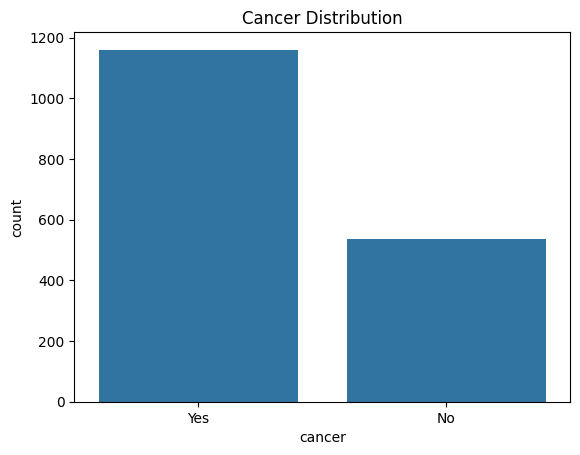

In [641]:
sns.countplot(x='cancer', data=df)
plt.title('Cancer Distribution')
plt.show()

Preprocess

In [642]:
df = df.drop(columns = ['id'])

In [643]:
df['histologicalclass'].fillna(df['histologicalclass'].min(), inplace=True)

<ipython-input-643-41c8090eb171>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['histologicalclass'].fillna(df['histologicalclass'].min(), inplace=True)


In [644]:
df['birads'].fillna(df['birads'].mode()[0], inplace=True)

<ipython-input-644-a77a4259d12f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['birads'].fillna(df['birads'].mode()[0], inplace=True)


In [645]:
df['year'].fillna(df['year'].median(), inplace=True)

<ipython-input-645-0d0ee9141c60>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)


In [646]:
df = df.dropna()

In [647]:
label_encoder = LabelEncoder()

In [648]:
categorical_columns = df.select_dtypes(include = "object")

In [649]:
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

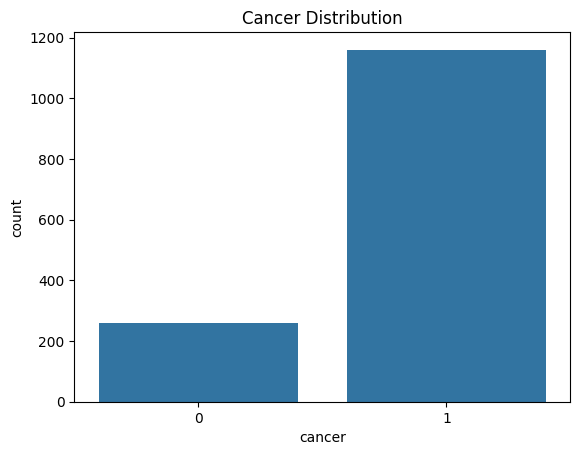

In [650]:
sns.countplot(x='cancer', data=df)
plt.title('Cancer Distribution')
plt.show()

In [651]:
print(df)

      age  menarche  menopause  agefirst  children  breastfeeding  nrelbc  \
0      50        11         25        30         0             38       6   
1      46        12         25        24         1             22      12   
2      47        13         25        14         1             22      14   
3      49        11         16         9         1             38       3   
4      54        14         11         4         1              2       6   
...   ...       ...        ...       ...       ...            ...     ...   
1688   21        11          0         0         0              0      13   
1692   42        12          2         8         2             21      13   
1694   21         9          0         0         0              0      13   
1695   25        12          0         0         0              0      13   
1696   20        11          0         0         0              0      13   

      biopsies  hyperplasia  race  ...  weight  exercise  alcohol  tobacco 

In [652]:
X = df.drop(columns = ['cancer'])
y = df['cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [653]:
df['cancer']

,cancer
0,1
1,1
2,1
3,1
4,1
...,...
1688,0
1692,0
1694,0
1695,0


In [654]:
select_k_best = SelectKBest(score_func = chi2, k = 5)
X_train_k_best = select_k_best.fit_transform(X_train, y_train)

print("Selected features: ", X_train.columns[select_k_best.get_support()])

Selected features:  Index(['menopause', 'agefirst', 'breastfeeding', 'exercise',
       'histologicalclass'],
      dtype='object')


In [655]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

feature_importances = pd.Series(importances, index = X_train.columns)
print(feature_importances.sort_values(ascending = False))

biopsies             0.270510
histologicalclass    0.233007
exercise             0.184102
menopause            0.116125
alcohol              0.028406
emotional            0.027694
breastfeeding        0.024446
tobacco              0.019360
weight               0.017812
birads               0.014113
children             0.013547
hyperplasia          0.011185
year                 0.008307
agefirst             0.007776
imc                  0.005568
depressive           0.004775
age                  0.004072
nrelbc               0.004021
allergies            0.002427
menarche             0.002026
race                 0.000724
dtype: float64


In [656]:
feature_names = ['age', 'menarche', 'menopause', 'agefirst', 'children', 'breastfeeding', 'nrelbc' , 'biopsies' , 'hyperplasia' , 'race' , 'year' , 'imc' , 'weight' , 'exercise' , 'alcohol' , 'tobacco' , 'allergies' , 'emotional' , 'depressive' , 'histologicalclass' , 'birads']

importances = feature_importances.sort_values(ascending = True)

In [657]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

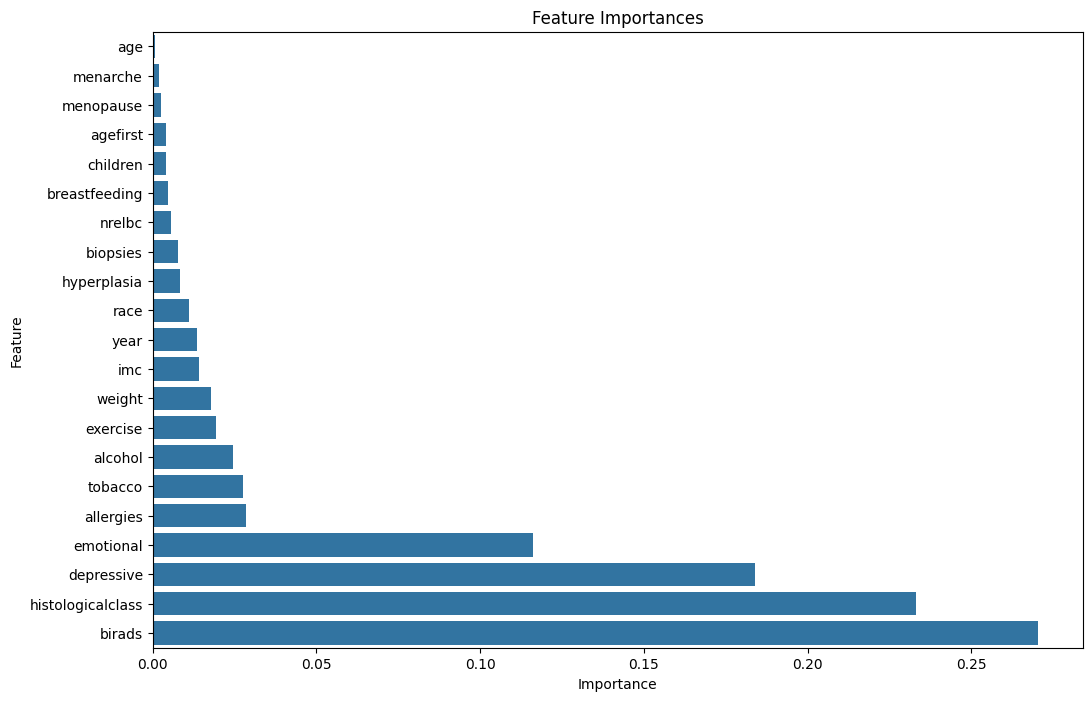

In [658]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()